In [1]:
from bokeh.io import show, output_notebook, output_file
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange, Legend, HoverTool, DatetimeTickFormatter, BoxAnnotation, Toggle, Label
from bokeh.transform import dodge
from bokeh.layouts import layout
from matplotlib.pyplot import viridis
import bokeh.palettes
from bokeh.embed import file_html
from bokeh.resources import CDN
from IPython.display import HTML
output_notebook()
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from branca.colormap import linear
from folium.features import DivIcon
import folium

HTML('''<script>
$('div.input').hide('500')
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Display code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Display code"></form>''')


    

Loading BokehJS ...

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 25px; }</style>"))

In [3]:
%%HTML
<style>
div.prompt {display:none}

</style>

## Transport vs covid-19

### 02806 Social data analysis and visualization

#### Technical University of Denmark 





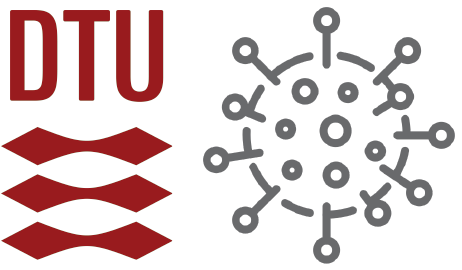


Navigate in the slideshow by using the ← → keys on your keyboard. 

### Introduction

This slideshow will investigate how the covid-19 lockdown in Denmark has effected public transport in the Urban Area of Copenhagen? This will be done by answering the following questions: 
* Is the development of public transport different from municipality to municipality?
* If so, can the demographic of the municipalities explain the difference?
    * How is age, education level, unemployment rate and disposable income distributed between the municipalities?
    * How do they correlate with the development of public transport. 


## Development of average speed per day

In [4]:
path = '/Users/tuethomsen28/Google Drev/SocialDataVizz/Data'

allspeed = pd.read_csv(os.path.join(path,"speedPerDay.csv"),sep=";",index_col=0)

allspeed.index = pd.to_datetime(allspeed.index)

source = ColumnDataSource(allspeed)

p = figure(plot_width=775, plot_height=300, x_axis_type="datetime",toolbar_location=None,
          y_range=(25,32)
          )
p.title.text = 'Avg. speed of public busses per day in Copenhagen'

color = bokeh.palettes.Category20[3]

legend_it = []

r = p.line("Date",
           "Hast",
           line_width=2,
           color=color[1],
           alpha=0.8,
           muted_color=color[1],
           muted_alpha=0.2,
           visible=True,
           source=source)

p.yaxis.axis_label = 'km/t'


hover = HoverTool(tooltips=[
    ('Speed: ', '@Hast km/t'),
    ("Date: ", '@Date{%d-%m}'),
    ("Day: ",'@DayOfWeek')],
    formatters = {'@Date':'datetime'},
    renderers=[r],
    mode="vline")

p.add_tools(hover)

lockdown1_start = pd.to_datetime('20200313')
lockdown1_end = pd.to_datetime('20200318')

lockdown2_start = pd.to_datetime('20200318')
lockdown2_end = pd.to_datetime('20200415')

easter_start = pd.to_datetime('20200404')
easter_end = pd.to_datetime('20200412')

reopening_start = pd.to_datetime('20200415')
reopening_end = pd.to_datetime('20200421')


lockdown1 = BoxAnnotation(left=lockdown1_start, right=lockdown1_end, 
                          fill_color='red', fill_alpha=0.1,visible=True)
lockdown2 = BoxAnnotation(left=lockdown2_start, right=lockdown2_end, 
                           fill_color='red', fill_alpha=0.2,visible=True)

easter = BoxAnnotation(left=easter_start, right=easter_end, 
                       fill_color='yellow', fill_alpha=0.2,visible=True)

reopening = BoxAnnotation(left=reopening_start, right=reopening_end, 
                       fill_color='green', fill_alpha=0.1,visible=True)

p.add_layout(lockdown1)
p.add_layout(lockdown2)
p.add_layout(easter)
p.add_layout(reopening)

#toggle1 = Toggle(label="Lockdown vol. 1", button_type="success", active=True)
#toggle1.js_link('active', lockdown1, 'visible')

#toggle2 = Toggle(label="Lockdown vol. 2", button_type="success", active=True)
#toggle2.js_link('active', lockdown2, 'visible')

#toggle3 = Toggle(label="Easter Break",button_type="success",active=True)
#toggle3.js_link('active', easter, 'visible')

#toggle4 = Toggle(label="Denmarks start reopening",button_type="success",active=True)
#toggle4.js_link('active', reopening, 'visible')

#show(layout([p], [toggle1,toggle2,toggle4]))

lockdown1_cit = Label(x=265, y=330, x_units='screen', y_units='screen',
                 text='First step of lockdown', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='8pt')

lockdown2_cit = Label(x=290, y=310, x_units='screen', y_units='screen',
                 text='Second step of lockdown', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='8pt')

easter_cit = Label(x=500, y=330, x_units='screen', y_units='screen',
                 text='Easter Break', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='8pt')

opening_cit = Label(x=620, y=330, x_units='screen', y_units='screen',
                 text='Opening', render_mode='canvas',
                 border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,
                 text_font_size='8pt')


p.add_layout(lockdown1_cit)
p.add_layout(lockdown2_cit)
p.add_layout(easter_cit)
p.add_layout(opening_cit)

show(p)

output_file("AvgSpeedOverTime.html", title="Interactive speed over time")

The amount of public transport can be measured on the average speed (km/t) of public busses per day. It can be seen from when the lockdown starter the 13. March that the average speed generally got higher. Especially from the 28/03 to the 13/04 is the average speed consistently high until a bit before the start of the reopening the 15/04. 

Try to hover over the graphic. Can you figure out why the average speed varies as a wave? 

## Percentage increase of speed pre -and post lockdown

# Barplot goes here

The percentage increase in speed differs from municipality to municipality. There are indications of a trend in the closer to the city center the more increases the speed. 